In [702]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import font_manager, rc

# 한글깨짐 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()  
rc('font', family=font_name) 


In [703]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [846]:
test_data.shape

(26072, 17)

In [704]:
train_data.head()

,id,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,move_out
0,61187,9167,해지,3,75,용지아파트,2,7,61188,9,...,2012.0,2008,40300,1897000,92,79,남,미혼,1,1
1,70016,10398,유효,10,222,용지아파트,2,7,70016,7,...,NaN,2009,64700,4320000,75,63,남,기혼,2,1
2,52239,7859,유효,3,80,용지아파트,2,7,52233,2,...,NaN,2015,36700,1954000,81,75,남,기혼,2,1
3,85470,12689,유효,10,222,지산5단지아파트,3,8,85460,6,...,NaN,2019,66600,3116000,72,70,여,미혼,1,1
4,7941,1161,해지,7,157,비둘기아파트,1,5,4750,8,...,2015.0,2015,146300,10259000,66,60,여,미혼,3,0


In [705]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60832 entries, 0 to 60831
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        60832 non-null  int64  
 1   순번        60832 non-null  int64  
 2   계약구분      60832 non-null  object 
 3   재계약횟수     60832 non-null  int64  
 4   거주개월      60832 non-null  int64  
 5   아파트 이름    60832 non-null  object 
 6   아파트 ID    60832 non-null  int64  
 7   아파트 평점    60832 non-null  int64  
 8   호실고유번호    60832 non-null  int64  
 9   층         60832 non-null  int64  
 10  평형대       60832 non-null  int64  
 11  계약자고유번호   60832 non-null  int64  
 12  계약서고유번호   60832 non-null  int64  
 13  입주연도      60832 non-null  int64  
 14  퇴거연도      18033 non-null  float64
 15  거주연도      60832 non-null  int64  
 16  월세(원)     60832 non-null  int64  
 17  보증금(원)    60832 non-null  int64  
 18  대표나이      60832 non-null  int64  
 19  나이        60832 non-null  int64  
 20  성별        60832 non-null  ob

In [706]:
# 복사본 생성 
train = train_data.copy()
test = test_data.copy()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'순번'}>,
        <AxesSubplot:title={'center':'재계약횟수'}>,
        <AxesSubplot:title={'center':'거주개월'}>],
       [<AxesSubplot:title={'center':'아파트 ID'}>,
        <AxesSubplot:title={'center':'아파트 평점'}>,
        <AxesSubplot:title={'center':'호실고유번호'}>,
        <AxesSubplot:title={'center':'층'}>],
       [<AxesSubplot:title={'center':'평형대'}>,
        <AxesSubplot:title={'center':'계약자고유번호'}>,
        <AxesSubplot:title={'center':'계약서고유번호'}>,
        <AxesSubplot:title={'center':'입주연도'}>],
       [<AxesSubplot:title={'center':'퇴거연도'}>,
        <AxesSubplot:title={'center':'거주연도'}>,
        <AxesSubplot:title={'center':'월세(원)'}>,
        <AxesSubplot:title={'center':'보증금(원)'}>],
       [<AxesSubplot:title={'center':'대표나이'}>,
        <AxesSubplot:title={'center':'나이'}>,
        <AxesSubplot:title={'center':'거주자 수'}>,
        <AxesSubplot:title={'center':'move_out'}>]], dtype=object)

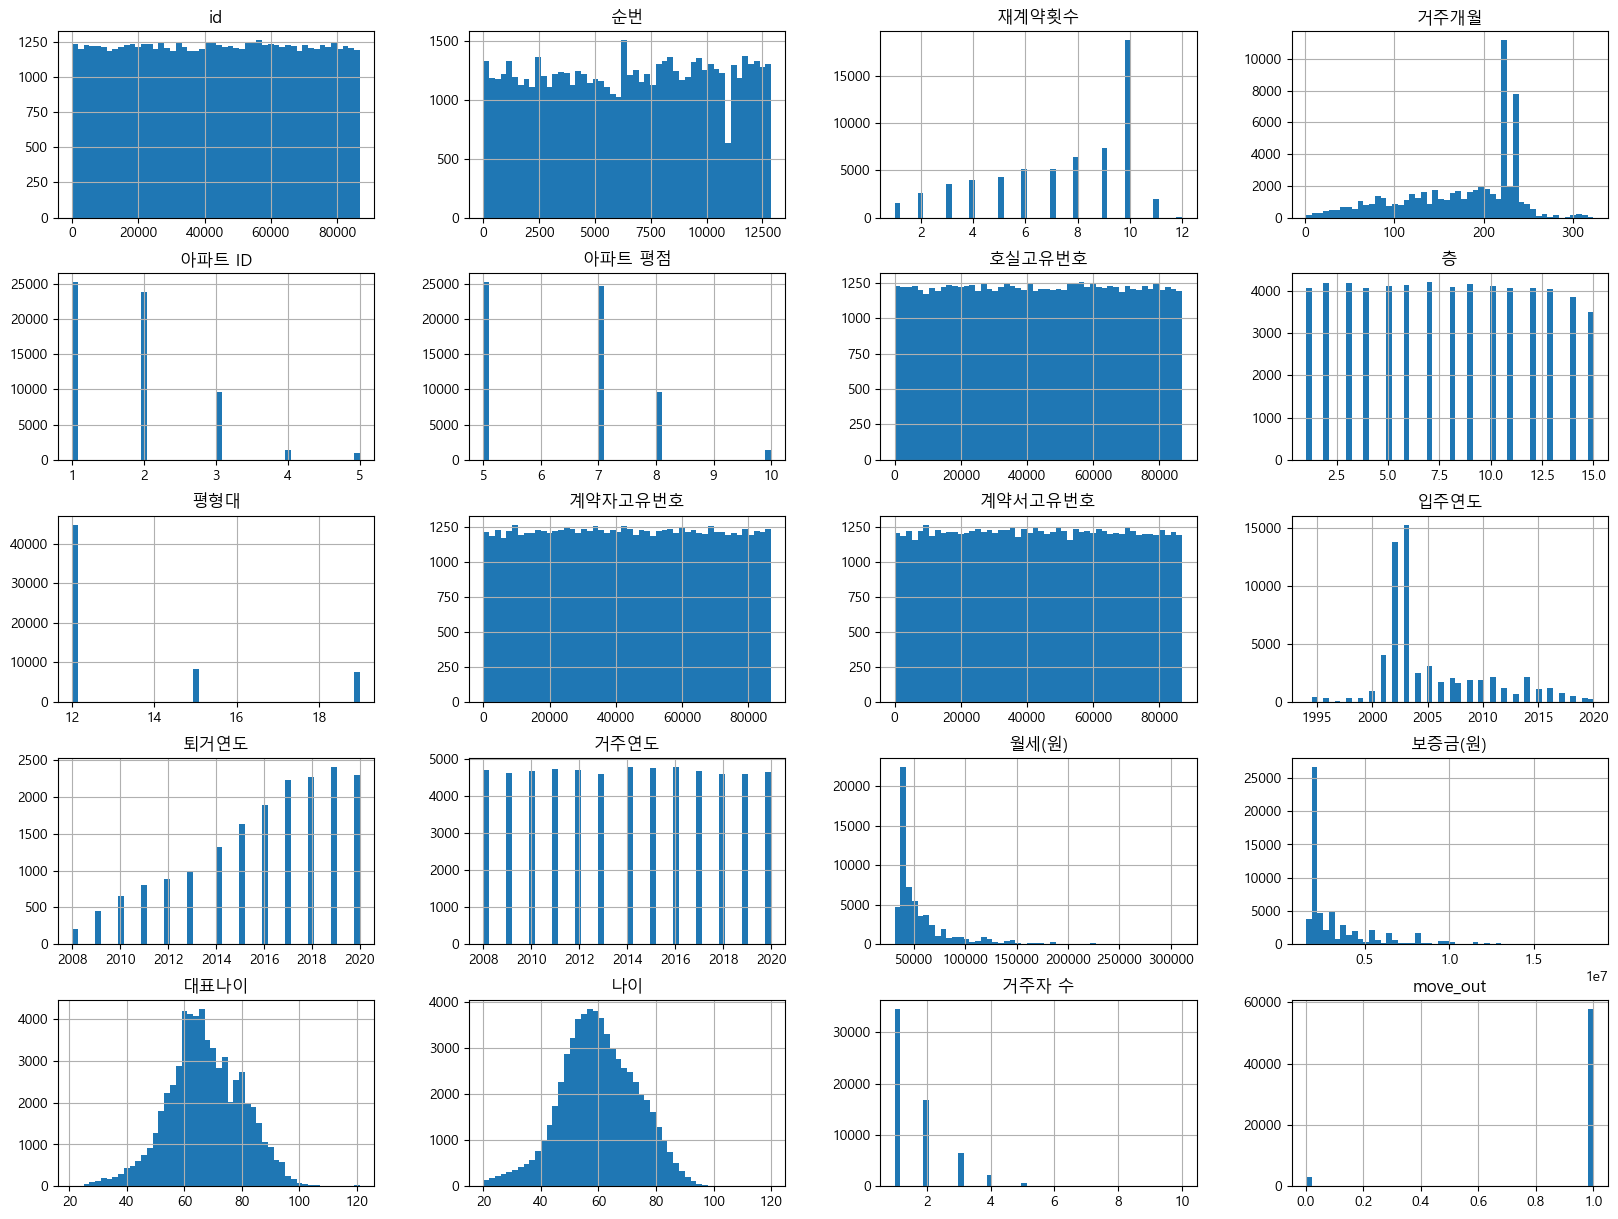

In [707]:
# 수치형 데이터만 출력 
train.hist(bins=50, figsize=(20, 15))

# target이 불균형 데이터셋 

In [708]:
# 불필요한 columns 제거 
train = train.drop(['id', '순번', '호실고유번호', '계약자고유번호', '계약서고유번호'], axis=1)
test = test.drop(['id', '순번', '호실고유번호', '계약자고유번호', '계약서고유번호'], axis=1)


In [709]:
print(train['아파트 이름'].value_counts())
print()
print(train['아파트 ID'].value_counts())

# 1 : 비둘기 아파트
# 2 : 용지아파트
# 3 : 지산5단지아파트
# 4 : 까치 아파트
# 5 : 강남아파트 
# 아파트 ID는 아파트이름에 대한 범주를 가짐 
train = train.drop(['아파트 이름'], axis=1)
test = test.drop(['아파트 이름'], axis=1)


비둘기아파트      25228
용지아파트       23792
지산5단지아파트     9591
까치아파트        1329
강남아파트         892
Name: 아파트 이름, dtype: int64

1    25228
2    23792
3     9591
4     1329
5      892
Name: 아파트 ID, dtype: int64


array([[<AxesSubplot:title={'center':'재계약횟수'}>,
        <AxesSubplot:title={'center':'거주개월'}>,
        <AxesSubplot:title={'center':'아파트 ID'}>,
        <AxesSubplot:title={'center':'아파트 평점'}>],
       [<AxesSubplot:title={'center':'층'}>,
        <AxesSubplot:title={'center':'평형대'}>,
        <AxesSubplot:title={'center':'입주연도'}>,
        <AxesSubplot:title={'center':'퇴거연도'}>],
       [<AxesSubplot:title={'center':'거주연도'}>,
        <AxesSubplot:title={'center':'월세(원)'}>,
        <AxesSubplot:title={'center':'보증금(원)'}>,
        <AxesSubplot:title={'center':'대표나이'}>],
       [<AxesSubplot:title={'center':'나이'}>,
        <AxesSubplot:title={'center':'거주자 수'}>,
        <AxesSubplot:title={'center':'move_out'}>, <AxesSubplot:>]],
      dtype=object)

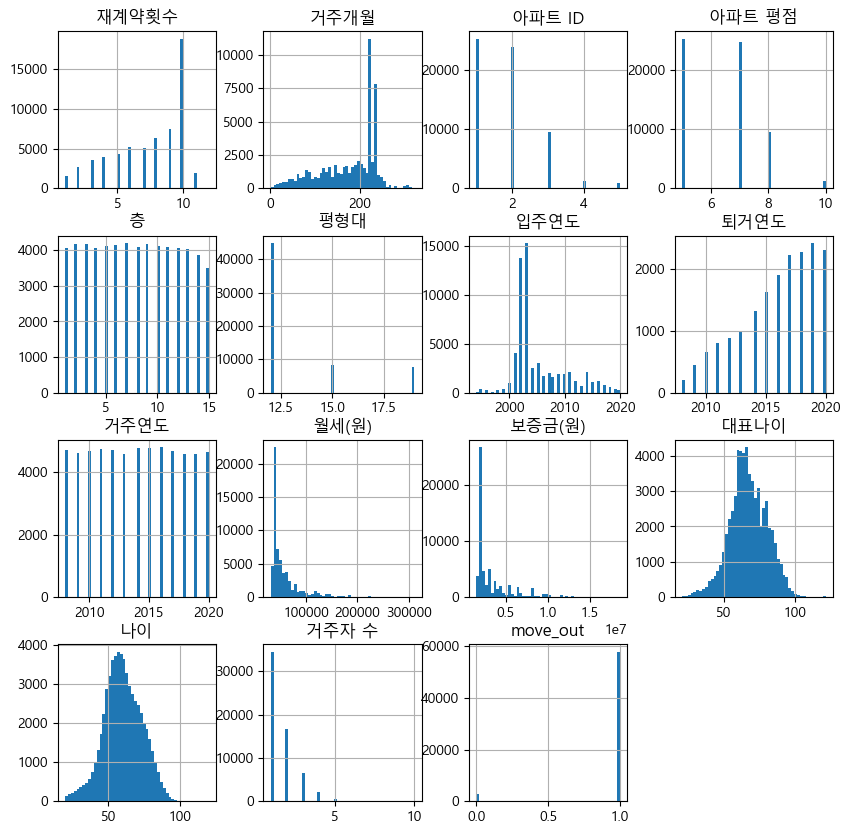

In [710]:
train.hist(bins=50, figsize=(10, 10))

### 결측치 처리


In [711]:
train.describe()

,재계약횟수,거주개월,아파트 ID,아파트 평점,층,평형대,입주연도,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수,move_out
count,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,18033.000000,60832.000000,60832.000000,6.083200e+04,60832.000000,60832.000000,60832.000000,60832.000000
mean,7.380425,174.313914,1.830632,6.393773,7.884896,13.289256,2005.245874,2015.985360,2013.989052,57683.088177,3.385542e+06,66.665900,59.654951,1.655428,0.951506
std,2.761137,64.803830,0.873536,1.282835,4.270328,2.387789,4.840107,3.144728,3.730135,30533.036487,2.378867e+06,12.941232,13.270605,0.929361,0.214810
min,1.000000,1.000000,1.000000,5.000000,1.000000,12.000000,1994.000000,2008.000000,2008.000000,31300.000000,1.520000e+06,21.000000,20.000000,1.000000,0.000000
25%,5.000000,126.000000,1.000000,5.000000,4.000000,12.000000,2002.000000,2014.000000,2011.000000,40300.000000,1.954000e+06,59.000000,51.000000,1.000000,1.000000
50%,8.000000,196.000000,2.000000,7.000000,8.000000,12.000000,2003.000000,2017.000000,2014.000000,43600.000000,2.144000e+06,66.000000,59.000000,1.000000,1.000000
75%,10.000000,222.000000,2.000000,7.000000,12.000000,15.000000,2008.000000,2019.000000,2017.000000,63600.000000,3.824000e+06,76.000000,69.000000,2.000000,1.000000
max,12.000000,323.000000,5.000000,10.000000,15.000000,19.000000,2020.000000,2020.000000,2020.000000,311080.000000,1.853640e+07,121.000000,120.000000,10.000000,1.000000


In [712]:
train.isnull().sum()  # 50%이상 결측값 => 제거

계약구분            0
재계약횟수           0
거주개월            0
아파트 ID          0
아파트 평점          0
층               0
평형대             0
입주연도            0
퇴거연도        42799
거주연도            0
월세(원)           0
보증금(원)          0
대표나이            0
나이              0
성별              0
결혼여부            0
거주자 수           0
move_out        0
dtype: int64

In [713]:
# 퇴거연도에 42799 결측치 존재 => 거주개월과 입주연도로 대략적인 유추 가능! 

print(train['거주개월'] / 12)
print()
print(train['퇴거연도'] - train['입주연도'])  
# 즉 퇴거연도는 입주연도 + 거주개월/12



0         6.250000
1        18.500000
2         6.666667
3        18.500000
4        13.083333
           ...    
60827    20.083333
60828    18.500000
60829     7.333333
60830    19.500000
60831     7.833333
Name: 거주개월, Length: 60832, dtype: float64

0         7.0
1         NaN
2         NaN
3         NaN
4        13.0
         ... 
60827     NaN
60828     NaN
60829     7.0
60830     NaN
60831     7.0
Length: 60832, dtype: float64


In [714]:
train['퇴거연도'] = train['퇴거연도'].fillna(train['입주연도'] + train['거주개월'] / 12).astype(int)
print(train['퇴거연도'])

test['퇴거연도'] = test['퇴거연도'].fillna(test['입주연도'] + test['거주개월']/12).astype(int)
print(test['퇴거연도'])


0        2012
1        2021
2        2020
3        2021
4        2015
         ... 
60827    2021
60828    2021
60829    2018
60830    2021
60831    2015
Name: 퇴거연도, Length: 60832, dtype: int32
0        2011
1        2021
2        2021
3        2021
4        2020
         ... 
26067    2021
26068    2021
26069    2021
26070    2021
26071    2020
Name: 퇴거연도, Length: 26072, dtype: int32


In [715]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

# 결측치 처리 완료 


계약구분        0
재계약횟수       0
거주개월        0
아파트 ID      0
아파트 평점      0
층           0
평형대         0
입주연도        0
퇴거연도        0
거주연도        0
월세(원)       0
보증금(원)      0
대표나이        0
나이          0
성별          0
결혼여부        0
거주자 수       0
move_out    0
dtype: int64

계약구분      0
재계약횟수     0
거주개월      0
아파트 ID    0
아파트 평점    0
층         0
평형대       0
입주연도      0
퇴거연도      0
거주연도      0
월세(원)     0
보증금(원)    0
대표나이      0
나이        0
성별        0
결혼여부      0
거주자 수     0
dtype: int64


In [716]:
# 방법 1. 

# train = train.drop(['퇴거연도'], axis=1)
# test = test.drop(['퇴거연도'], axis=1)

In [717]:
# 방법 2. 

# from sklearn.impute import KNNImputer
# 인접 이웃의 가중 또는 가중 평균을 사용해 대치
# imputer = KNNImputer(n_neighbors=3)
# train_cat = train.select_dtypes(object).columns
# train_num = train.drop(train_cat, axis=1)
# test_num = test.drop(train_cat, axis=1)

# train_impute = imputer.fit_transform(train_num).astype(int)
# test_impute = imputer.fit_transform(test_num).astype(int)

# train_num = pd.DataFrame(train_impute, index=train_num.index, columns=train_num.columns)
# test_num = pd.DataFrame(test_impute, index=test_num.index, columns=test_num.columns)

# train = pd.concat([train_num, train.select_dtypes(object)], axis=1)
# test = pd.concat([test_num, test.select_dtypes(object)], axis=1)


In [718]:
train.corr()['move_out']

재계약횟수       0.223704
거주개월        0.217926
아파트 ID      0.019568
아파트 평점      0.019963
층           0.005402
평형대         0.023630
입주연도        0.004543
퇴거연도        0.412519
거주연도       -0.015578
월세(원)      -0.021827
보증금(원)     -0.021084
대표나이        0.020510
나이          0.015623
거주자 수      -0.061058
move_out    1.000000
Name: move_out, dtype: float64

### 원핫인코딩


In [719]:
train.select_dtypes(object) 
# 모두 2개의 범주를 가짐(0 또는 1)

,계약구분,성별,결혼여부
0,해지,남,미혼
1,유효,남,기혼
2,유효,남,기혼
3,유효,여,미혼
4,해지,여,미혼
...,...,...,...
60827,유효,여,미혼
60828,유효,남,미혼
60829,해지,여,미혼
60830,유효,남,기혼


In [720]:
# 3개의 변수는 "범주형 변수"로 보이므로, get_dummies() 함수 사용하여 전처리
#drop_first=True 옵션으로 가변수의 첫번째 변수를 자동 삭제하여 가변수 함정(dummy trap) 방지
train_data = pd.get_dummies(train, drop_first=True)
print("train_data 특성:\n", list(train.columns))

print("-"*50)

test_data = pd.get_dummies(test, drop_first=True)
print("test_data 후의 특성:\n", list(test.columns))


train_data 특성:
 ['계약구분', '재계약횟수', '거주개월', '아파트 ID', '아파트 평점', '층', '평형대', '입주연도', '퇴거연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '성별', '결혼여부', '거주자 수', 'move_out']
--------------------------------------------------
test_data 후의 특성:
 ['계약구분', '재계약횟수', '거주개월', '아파트 ID', '아파트 평점', '층', '평형대', '입주연도', '퇴거연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '성별', '결혼여부', '거주자 수']


In [721]:
train_data.head()

# 미혼 1 기혼 0
# 해지 1 유효 0
# 여 1 남 0

,재계약횟수,거주개월,아파트 ID,아파트 평점,층,평형대,입주연도,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수,move_out,계약구분_해지,성별_여,결혼여부_미혼
0,3,75,2,7,9,12,2005,2012,2008,40300,1897000,92,79,1,1,1,0,1
1,10,222,2,7,7,12,2003,2021,2009,64700,4320000,75,63,2,1,0,0,0
2,3,80,2,7,2,12,2014,2020,2015,36700,1954000,81,75,2,1,0,0,0
3,10,222,3,8,6,19,2003,2021,2019,66600,3116000,72,70,1,1,0,1,1
4,7,157,1,5,8,19,2002,2015,2015,146300,10259000,66,60,3,0,1,1,1


In [722]:
## 특징-정답데이터 분리
X_train = train_data.drop(['move_out'], axis=1)
y_train = train_data['move_out']

print(X_train.shape)
print(y_train.shape)

print(test_data.shape)


(60832, 17)
(60832,)
(26072, 17)


In [725]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(test_data)

In [726]:

X_train = pd.DataFrame(X_scaled, index=X_train.index,
                       columns=X_train.columns)

X_test = pd.DataFrame(X_test, index=test_data.index, columns=test_data.columns)


In [730]:
print(X_train.shape)
print(X_test.shape)

(60832, 17)
(26072, 17)


In [ ]:
# # 검증세트 필요시
# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# # 각 분할 결과의 index를 바탕으로 strat_train_set과 strat_test_set 생성
# for train_index, test_index in split.split(X_train, y_train):
#     strat_train_set = X_train.loc[train_index]
#     strat_valid_set = X_train.loc[test_index]

# print(strat_train_set.shape)
# print(strat_valid_set.shape)

# # train_set의 소득카테고리별 비율
# print(strat_train_set["move_out"].value_counts() / len(strat_train_set))

# print('-'*40)

# # 전체 데이터의 각 계층별 비율
# print(train["move_out"].value_counts() / len(train))

#### 데이터 준비 끝 -> X_train, y_train, X_valid, y_valid, X_test

### 모델링



In [731]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [732]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# 앙상블 모델 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

# 기타 
import xgboost as xgb
import catboost


In [733]:

knn_clf = KNeighborsClassifier(n_neighbors=6)
dt_clf = DecisionTreeClassifier(max_depth=8)
lr_clf = LogisticRegression()

# 배깅 
rf_clf = RandomForestClassifier(n_estimators=300, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=300, random_state=42)

# 부스팅 
gb_clf = GradientBoostingClassifier(learning_rate=0.05)
ada_clf = AdaBoostClassifier(n_estimators=100)

xgb_clf = xgb.XGBClassifier()
cat_clf = catboost.CatBoostClassifier(iterations=300, learning_rate=0.1)

# 보팅
vot_clf = VotingClassifier(estimators=[(
    "lr", dt_clf), ("rf", rf_clf), ("gbm", gb_clf), ("ada", ada_clf)], voting="soft")


In [734]:
def model(name, x):
    x.fit(X_train, y_train)
    train_pred = x.predict(X_train)
    train_scores = roc_auc_score(y_train, train_pred)
    scores = cross_val_score(x, X_train, y_train, cv=5, scoring='roc_auc')  # 교차검증 
    
    print(name, train_scores, scores.mean())
    print(confusion_matrix(y_train, train_pred))  # 혼동행렬 출력하기 

In [735]:
# 대충 쓸만한 모델 찾기 위한 작업 
model("knn", knn_clf)  # baseline 모델 

knn 0.6795869035717904 0.8889645911219617
[[ 1080  1870]
 [  401 57481]]


In [736]:
model("dt", dt_clf)
model("rf", rf_clf)
model('lr', lr_clf)
model('et', et_clf)
model("xgb", xgb_clf)
model("gbm", gb_clf)
model("ada", ada_clf)
model("voting", vot_clf)
model("cat", cat_clf)


dt 0.8061016949152542 0.9929514912729133
[[ 1806  1144]
 [    0 57882]]
rf 1.0 0.998968572220374
[[ 2950     0]
 [    0 57882]]
lr 1.0 1.0
[[ 2950     0]
 [    0 57882]]
et 1.0 0.9988659732779048
[[ 2950     0]
 [    0 57882]]
[16:09:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[16:09:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[16:09:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[16:09:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scoring" } 

In [813]:
import xgboost 
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train, eval_metric="auc")

c:\Users\AI06\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [799]:
# 보팅
vot_clf = VotingClassifier(estimators=[(
    "lr", lr_clf), ("xgb", xgb_clf), ("gbm", gb_clf), ("ada", ada_clf)], voting="soft")


In [801]:
model("vot_clf", vot_clf)

[16:27:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[16:28:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[16:28:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[16:28:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[16:28:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[16:28:32] WARN

### 하이퍼파라미터 튜닝 

#### 예측 및 제출 

In [841]:
def test(model):
    test_pred = model.predict(X_test)
    test_prob = model.predict_proba(X_test)
    
    pred = pd.DataFrame(test_pred)
    pred['test_prob'] = test_prob[:, 1]
    
    for i in range(len(pred)):
        if pred[0][i] == 0:
            pred[0][i] = 1 - pred['test_prob'][i]
            
    submission = pd.read_csv("sample_submission.csv")
    submission['move_out'] = pred['test_prob']
    
    return submission

In [844]:
file = test(xgb)
file.to_csv("xgb2.csv", index=False)

C:\Users\AI06\AppData\Local\Temp\ipykernel_12584\1319989964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred[0][i] = 1 - pred['test_prob'][i]


In [843]:
file 

,id,move_out
0,77315,0.999938
1,9515,1.000000
2,1668,0.999999
3,57273,1.000000
4,19049,0.999999
...,...,...
26067,81241,1.000000
26068,83076,1.000000
26069,25820,0.999977
26070,36133,0.999999
